In [ ]:
#The code below produces a plot of the Hermite Poisson flow as described in the paper:
#"Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
#The first part precomputes the coefficients of the polynomial expansion and stores it in a file.
#The second part reads the file and produces an implicit plot, i.e. visualises the flow of the real roots.
#The accuracy of the computations depends on:
# 1. the precision of the Real and ComplexBallFields (1500), 
# 2. the integral limits (+/-200),
# 3. the number of terms in the expansion (500)
#These have been set such that X^{\mathcal{H}}_1(80) evaluates correctly at more than 20 digits accuracy. 
#Version 1.0, 23 feb 2024 

In [2]:
#Generate a plot of all ordinates of the non-trivial zeros < 80 to overlay the flow graphs
var('y')
m1 = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 80:
            m1.append([y,1])

z=list_plot(m1, size=12, marker="o", color = "red")

In [3]:
#Hermite coefficients precomputation b_n
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def integrand(n,x):
    expo=-1*CCF(x/2).pow(2)
    integr=x.pow(n)*expo.exp()*Phi(x.abs(),60)
    return integr

def bn(n,M):
    prefact = CCF(I).pow(n)*CCF(2).pow(-n)*CCF(n+1).rgamma()
    res= prefact*CCF.integral(lambda x, _: integrand(n,x), -M, M)
    return real_part(res)

def genbcoeffs(N,M):
    f = open("bncoeff", "w")
    for n in range(N):
        if Mod(n,2) == 1:
            f.write("0"); f.write("\r\n") #the coefficients are 0 for odd n
        else:
            f.write(str(bn(n,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genbcoeffs(500,200)

0

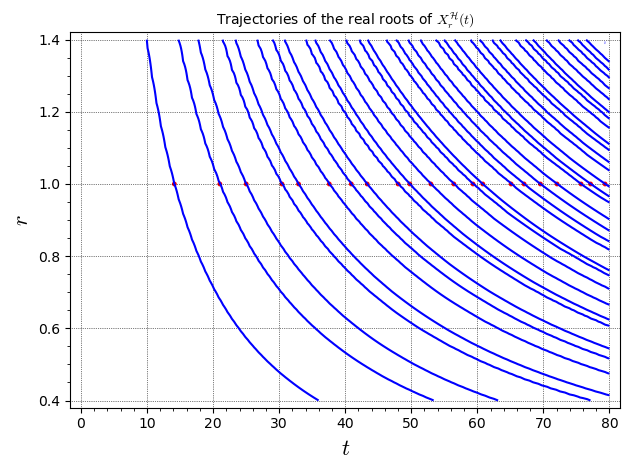

In [6]:
var("r","t");

RDF=RealBallField(1024)
global m1; m1 = []
with open("bncoeff", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1024)
def HermiteFlow(t,r):
    sum=CCF(0)
    for n in range(500):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*CCF(t).hermite_H(n)
    return real_part(sum);

a=implicit_plot(lambda t,r:((RDF(HermiteFlow(t,r)))),(t,0,80),(r,0.4,1.4),color='blue',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{H}}_r(t)$',gridlines=True,plot_points=120)
show(a+z,aspect_ratio='automatic')

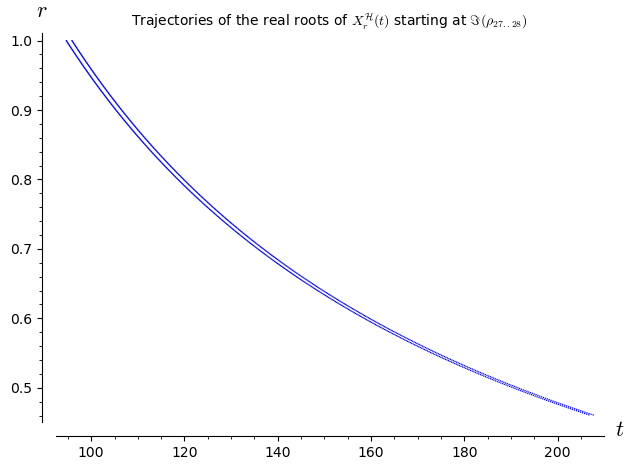

In [26]:
#A plot of a trace of the 27th and 28th non-trivial zero, where we know a collision in the De Bruijn Newman flow
#occurs -0.25 < lambda < 0, to demonstrate that this pair also collides in the Hermite Poisson flow.
var('n, r, x, y')
import csv
import numpy as np

with open('HermiteHtest.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    m1 = []

    for row in readCSV:
        n = float(row[0].replace(" ", "")) 
        r = float(row[1].replace(" ", "")) 
        x = float(row[2].replace(" ", "")) 
        y = float(row[3].replace(" ", "")) 
        
        if r > 0.46:
            m1.append([x, r])

b=point2d(m1, color='blue', marker="o", size=1,axes_labels=[r'$t$',r'$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{H}}_r(t)$ starting at $\Im(\rho_{27..28})$')
show(b,aspect_ratio='automatic')